In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv("HRDataset.csv")

# Show first 5 rows
print(df.head(5))

              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert  

In [9]:
#Shape of the rows and columns
print(df.shape)

(311, 36)


####The result above means that there are 311 rows and 36 columns in the dataset.

In [10]:
#Displaying column names with their data types
print(df.dtypes)

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [11]:
#Finding the number of unique values in each column
print(df.nunique())

Employee_Name                 311
EmpID                         311
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
DeptID                          6
PerfScoreID                     4
FromDiversityJobFairID          2
Salary                        308
Termd                           2
PositionID                     30
Position                       32
State                          28
Zip                           158
DOB                           307
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofHire                    101
DateofTermination              96
TermReason                     18
EmploymentStatus                3
Department                      6
ManagerName                    21
ManagerID                      23
RecruitmentSource               9
PerformanceSco

In [12]:


#Identifying missing values in the dataset and listing columns with nulls.
print(df.isnull().sum())


Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [13]:
#Describing the numerical columns (mean, median, std)
print(df.describe())

              EmpID   MarriedID  MaritalStatusID    GenderID  EmpStatusID  \
count    311.000000  311.000000       311.000000  311.000000   311.000000   
mean   10156.000000    0.398714         0.810289    0.434084     2.392283   
std       89.922189    0.490423         0.943239    0.496435     1.794383   
min    10001.000000    0.000000         0.000000    0.000000     1.000000   
25%    10078.500000    0.000000         0.000000    0.000000     1.000000   
50%    10156.000000    0.000000         1.000000    0.000000     1.000000   
75%    10233.500000    1.000000         1.000000    1.000000     5.000000   
max    10311.000000    1.000000         4.000000    1.000000     5.000000   

           DeptID  PerfScoreID  FromDiversityJobFairID         Salary  \
count  311.000000   311.000000              311.000000     311.000000   
mean     4.610932     2.977492                0.093248   69020.684887   
std      1.083487     0.587072                0.291248   25156.636930   
min      1.000

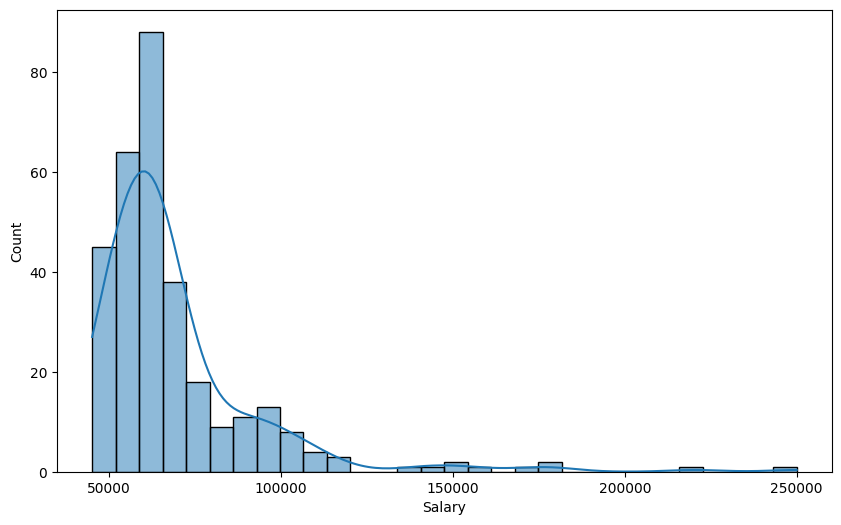

In [14]:
#Distribution of employee salaries.
#Distribution of employee salaries.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df["Salary"], bins=30, kde=True)
plt.show()

In [16]:
#average age of employees at the company
import pandas as pd
from datetime import datetime

#Covert DOB to datetime format
df["DOB"] = pd.to_datetime(df["DOB"], errors="coerce")

# Calculate age for each employee
today = pd.to_datetime("today")
df["Age"] = (today - df["DOB"]).dt.days // 365

# Calculate average age
average_age = df["Age"].mean()

print("The average age of employees at the company is:", round(average_age, 1), "years")




The average age of employees at the company is: 16.9 years


In [17]:
#How many employees are still employed vs terminated
employment_counts = df["EmploymentStatus"].value_counts()
print(employment_counts)

EmploymentStatus
Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: count, dtype: int64


In [18]:
#Departments with the most employees
department_counts=df["Department"].value_counts()
print(department_counts)

Department
Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: count, dtype: int64


In [19]:
#average salary per department?
average_salary_per_department = df.groupby("Department")["Salary"].mean()
print(average_salary_per_department)

Department
Admin Offices            71791.888889
Executive Office        250000.000000
IT/IS                    97064.640000
Production               59953.545455
Sales                    69061.258065
Software Engineering     94989.454545
Name: Salary, dtype: float64


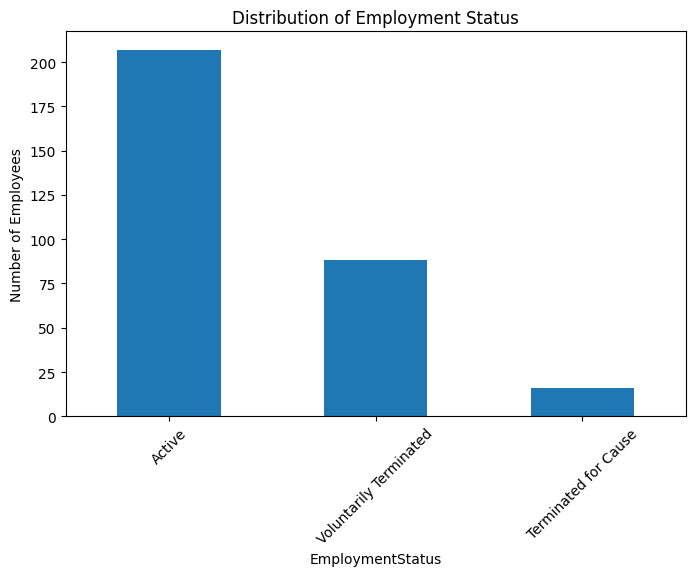

In [26]:
#distribution of employment status (Active, Voluntarily Terminated, etc.)
import matplotlib.pyplot as plt

df["EmploymentStatus"].value_counts().plot(kind="bar", figsize=(8,5))
plt.title("Distribution of Employment Status")
plt.xlabel("EmploymentStatus")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()


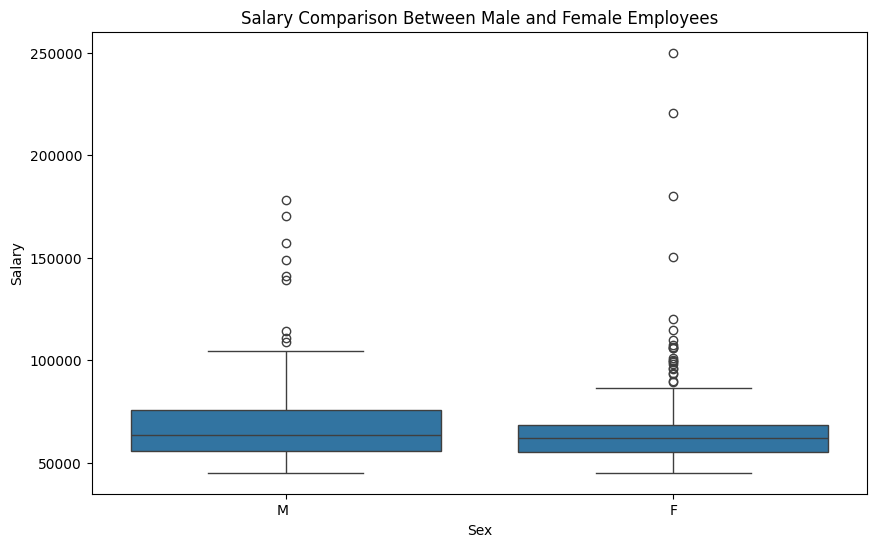

In [31]:
#Comparison of salary levels between Male and Female employees.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure (figsize=(10,6))
sns.boxplot (data=df, x="Sex", y="Salary")
plt.title("Salary Comparison Between Male and Female Employees")
plt.xlabel("Sex")
plt.ylabel("Salary")
plt.show()



In [34]:
# Recruitment source bringing in the most employees
recruitment_source_counts = df["RecruitmentSource"].value_counts()
print(recruitment_source_counts)

print("\nRecruitment source with the most employees:", recruitment_source_counts.idxmax())

RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64

Recruitment source with the most employees: Indeed


In [36]:
print(df.columns.tolist())


['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'Age']


In [37]:
#percentage of employees who attended a Diversity Job Fair?
diversity_job_fair_percentage = (df["FromDiversityJobFairID"] == "Yes").mean() * 100
print(f"Percentage of employees who attended a Diversity Job Fair: {diversity_job_fair_percentage:.2f}%")

Percentage of employees who attended a Diversity Job Fair: 0.00%


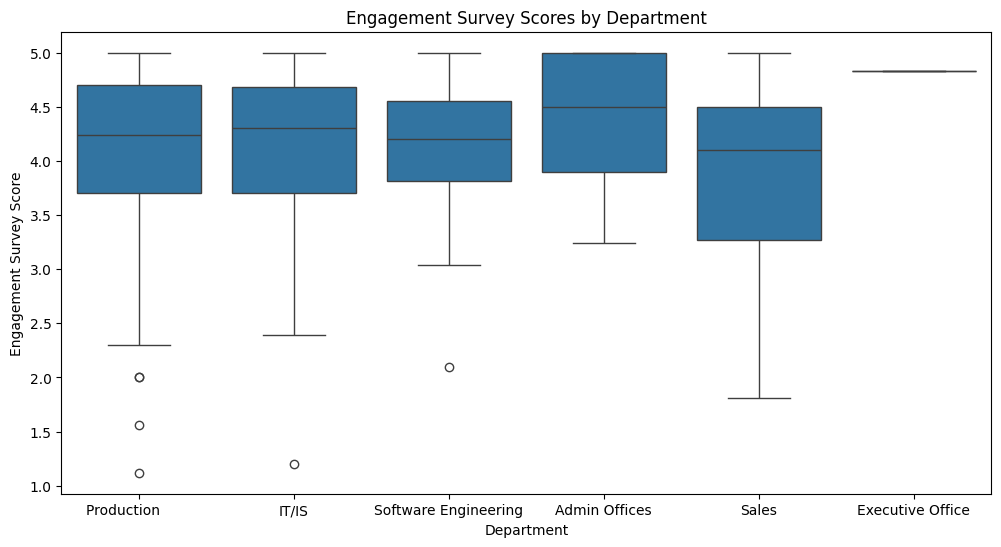

In [42]:
#Comparison engagement survey scores across different departments.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure (figsize=(12,6))
sns.boxplot(data=df, x="Department", y="EngagementSurvey")
plt.title("Engagement Survey Scores by Department")
plt.xlabel("Department")
plt.ylabel("Engagement Survey Score")
plt.show()

In [43]:
#race with the highest average salary
average_salary_per_race = df.groupby("RaceDesc")["Salary"].mean()
print(average_salary_per_race)
print("\nRace with the highest average salary:", average_salary_per_race.idxmax())

RaceDesc
American Indian or Alaska Native    65806.000000
Asian                               68521.206897
Black or African American           74431.025000
Hispanic                            83667.000000
Two or more races                   59998.181818
White                               67287.545455
Name: Salary, dtype: float64

Race with the highest average salary: Hispanic


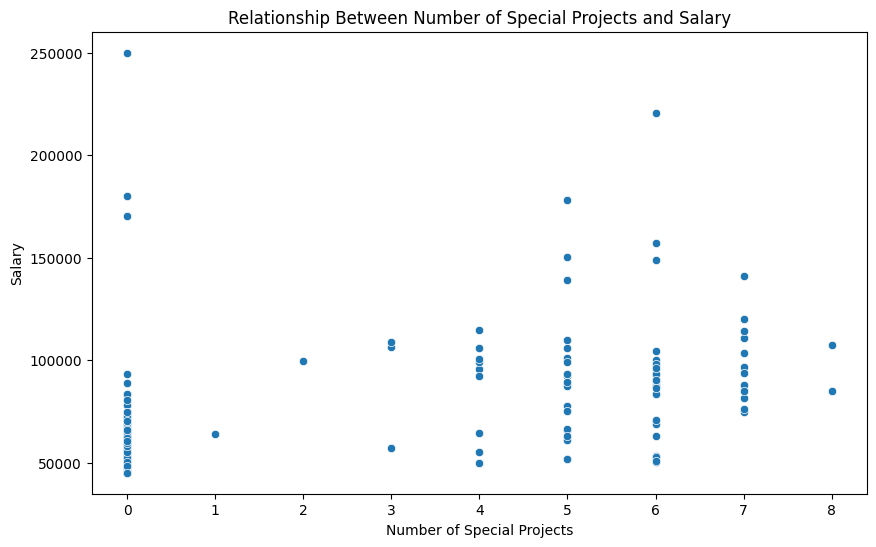

In [44]:
#relationship between number of projects (SpecialProjectsCount) and salary
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="SpecialProjectsCount", y="Salary")
plt.title("Relationship Between Number of Special Projects and Salary")
plt.xlabel("Number of Special Projects")
plt.ylabel("Salary")
plt.show()

In [45]:
#Comparison of average salaries between married employees and single employees
average_salary_by_marital_status = df.groupby("MaritalDesc")["Salary"].mean()
print(average_salary_by_marital_status)

MaritalDesc
Divorced     64427.333333
Married      69827.717742
Separated    62934.333333
Single       70052.576642
Widowed      65195.125000
Name: Salary, dtype: float64


In [ ]:
#managers with the largest teams
manager_team_sizes = df["ManagerName"].value_counts()
print(manager_team_sizes.head(10))  # Top 10 managers with the largest teams

ManagerName
Michael Albert    22
Kissy Sullivan    22
Elijiah Gray      22
Kelley Spirea     22
Brannon Miller    22
David Stanley     21
Webster Butler    21
Ketsia Liebig     21
Amy Dunn          21
Janet King        19
Name: count, dtype: int64


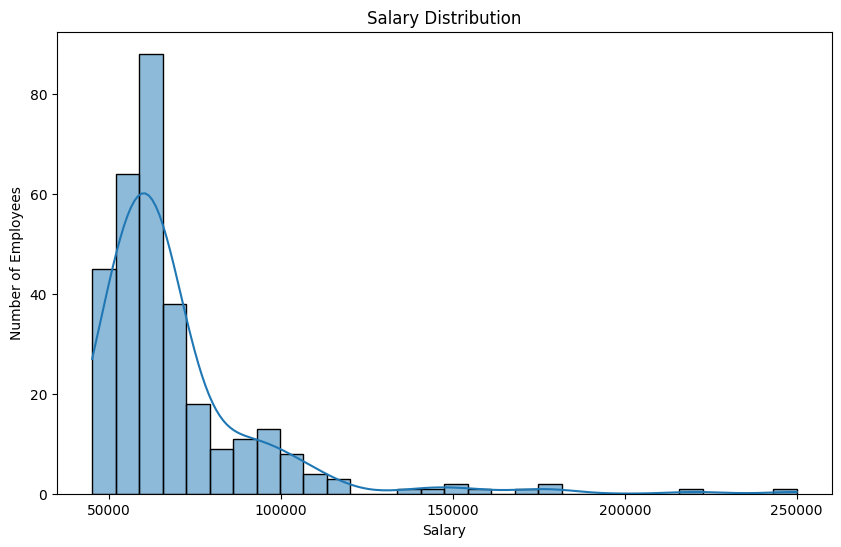

In [48]:
#salary distribution using histograms.
import matplotlib.pyplot as pltplt
plt.figure (figsize=(10,6))
sns.histplot(df["Salary"], bins=30, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.show()


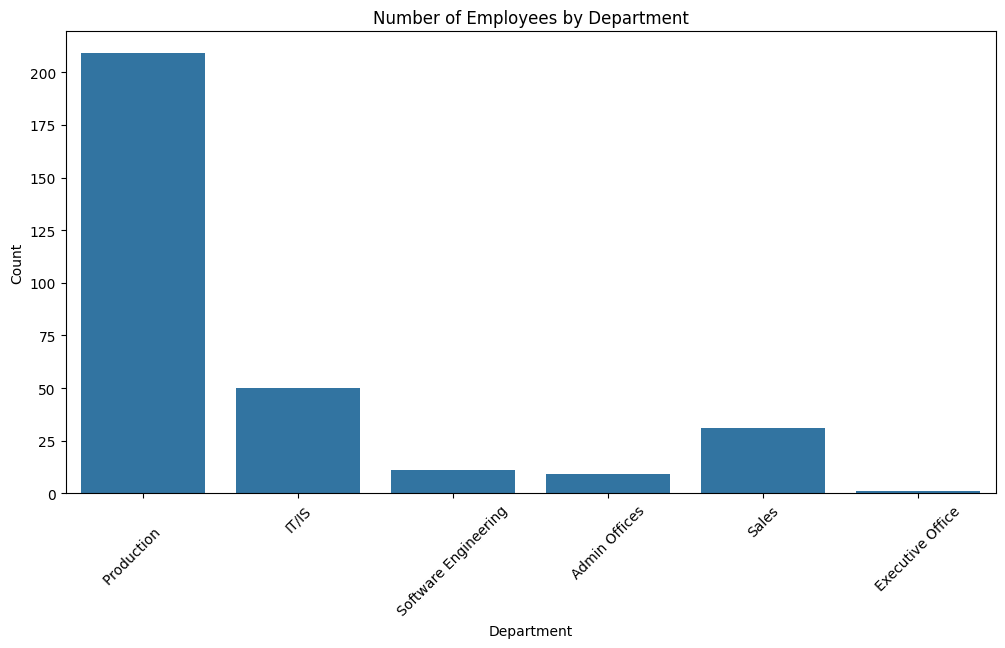

In [50]:
#count of employees by department
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Department")
plt.title("Number of Employees by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [52]:
print(df.columns.tolist())


['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'Age']


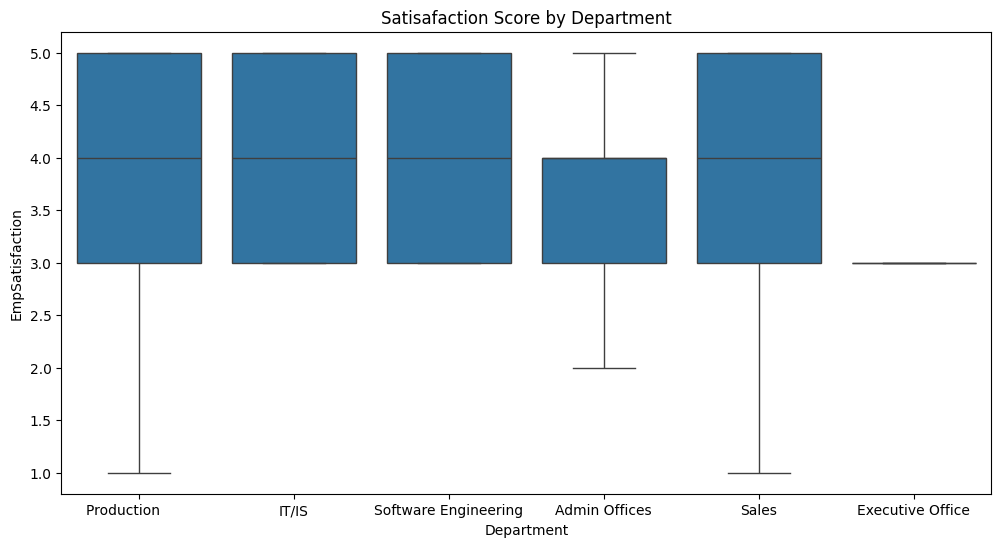

In [53]:
#Comparison of average satisfaction score by department
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (12,6))
sns.boxplot(data=df, x="Department", y="EmpSatisfaction")
plt.title("Satisafaction Score by Department")
plt.xlabel("Department")
plt.ylabel("EmpSatisfaction")
plt.show()

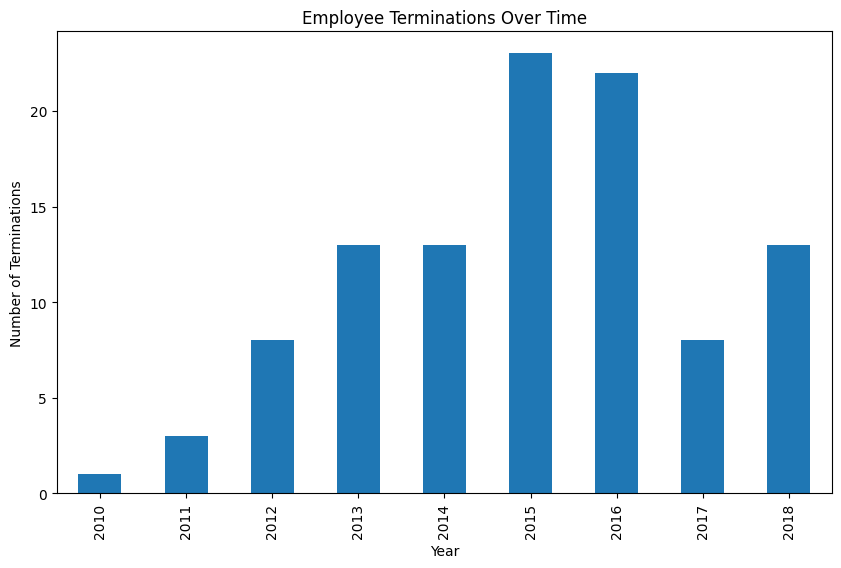

In [68]:
#Visualization of  employee terminations over time.
import matplotlib.pyplot as plt
df["TermDate"] = pd.to_datetime(df["DateofTermination"], errors="coerce")
terminated = df[df["DateofTermination"].notnull()]
terminations_per_year = terminated["TermDate"].dt.year.value_counts().sort_index()

plt.figure(figsize=(10,6))
terminations_per_year.plot(kind="bar")
plt.title("Employee Terminations Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Terminations")
plt.show()


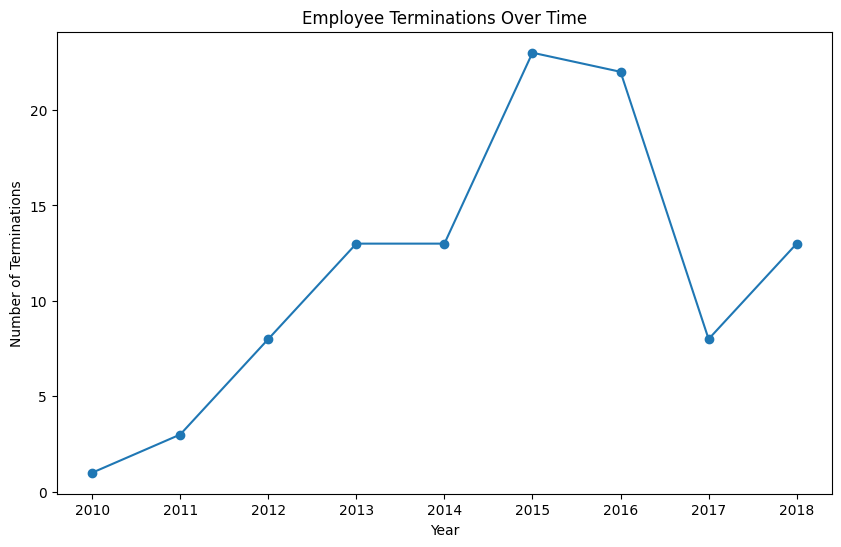

In [70]:
#Visualization of  employee terminations over time.
import matplotlib.pyplot as plt
df["TermDate"] = pd.to_datetime(df["DateofTermination"], errors="coerce")
terminated = df[df["DateofTermination"].notnull()]
terminations_per_year = terminated["TermDate"].dt.year.value_counts().sort_index()

plt.figure(figsize=(10,6))
terminations_per_year.plot(kind="line", marker="o")
plt.title("Employee Terminations Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Terminations")
plt.show()


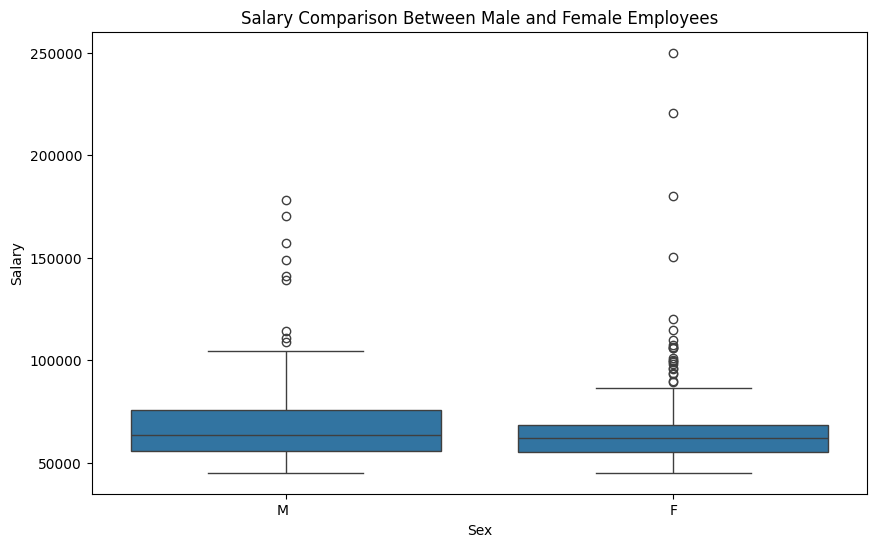

In [59]:
#average salary by gender using a boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Sex", y="Salary")
plt.title("Salary Comparison Between Male and Female Employees")
plt.xlabel("Sex")
plt.ylabel("Salary")
plt.show()

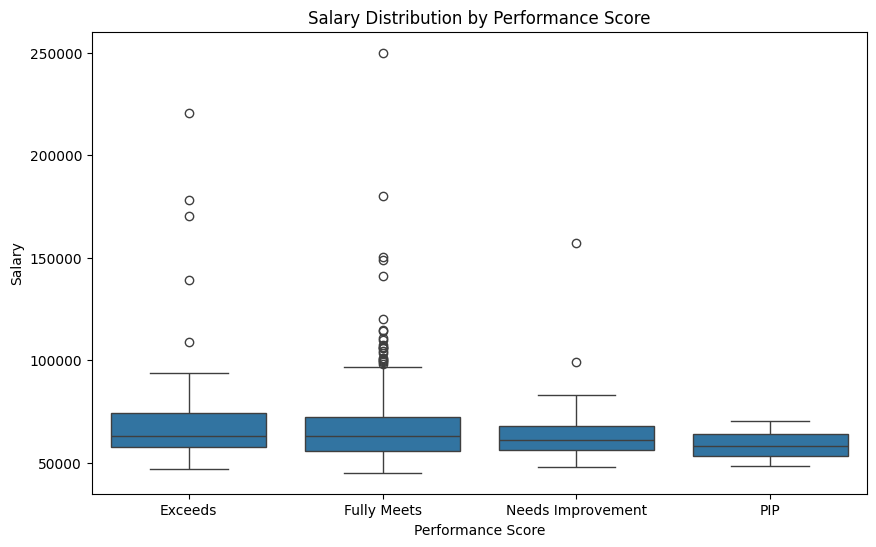

In [60]:
#Visualization of  performance scores vs salary
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="PerformanceScore", y="Salary")
plt.title("Salary Distribution by Performance Score")
plt.xlabel("Performance Score")
plt.ylabel("Salary")
plt.show()

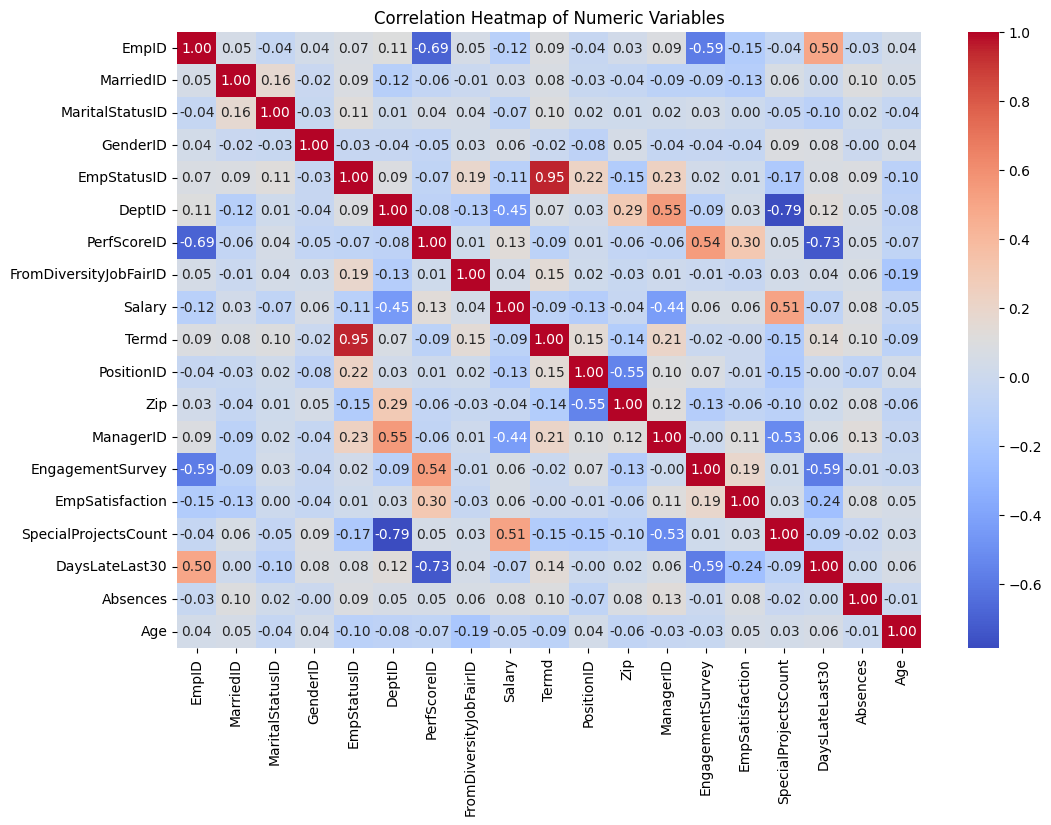

In [61]:
# heatmap of correlations between numeric variables.
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for numeric columns
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

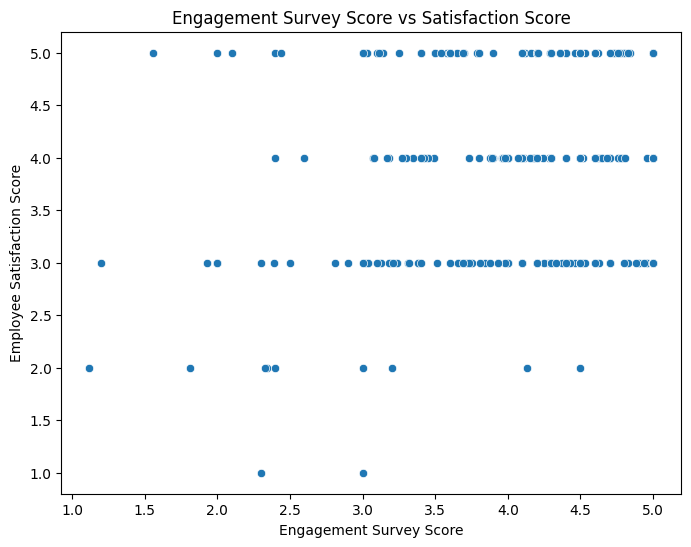

In [62]:
#engagement survey score vs satisfaction score
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="EngagementSurvey", y="EmpSatisfaction")
plt.title("Engagement Survey Score vs Satisfaction Score")
plt.xlabel("Engagement Survey Score")
plt.ylabel("Employee Satisfaction Score")
plt.show()

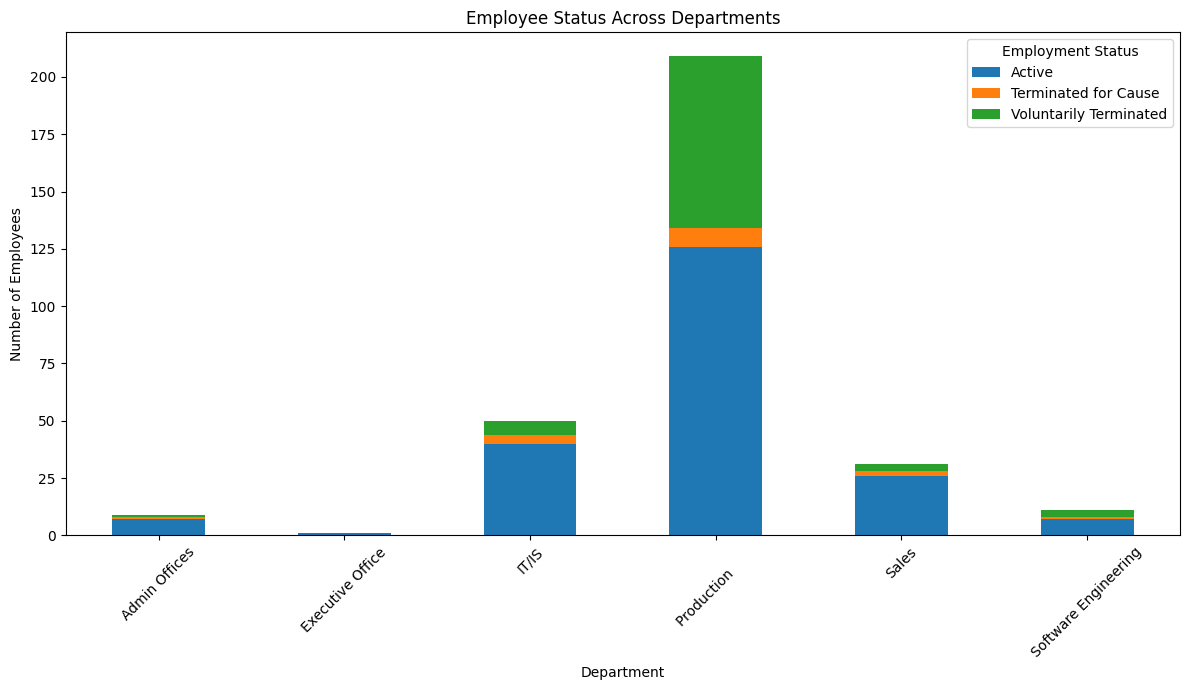

In [63]:
#stacked bar chart of employee status across departments
import matplotlib.pyplot as plt
import pandas as pd

# Create a crosstab of Department vs EmploymentStatus
dept_status = pd.crosstab(df["Department"], df["EmploymentStatus"])

# Plot as a stacked bar chart
dept_status.plot(kind="bar", stacked=True, figsize=(12,7))
plt.title("Employee Status Across Departments")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.legend(title="Employment Status")
plt.tight_layout()
plt.show()

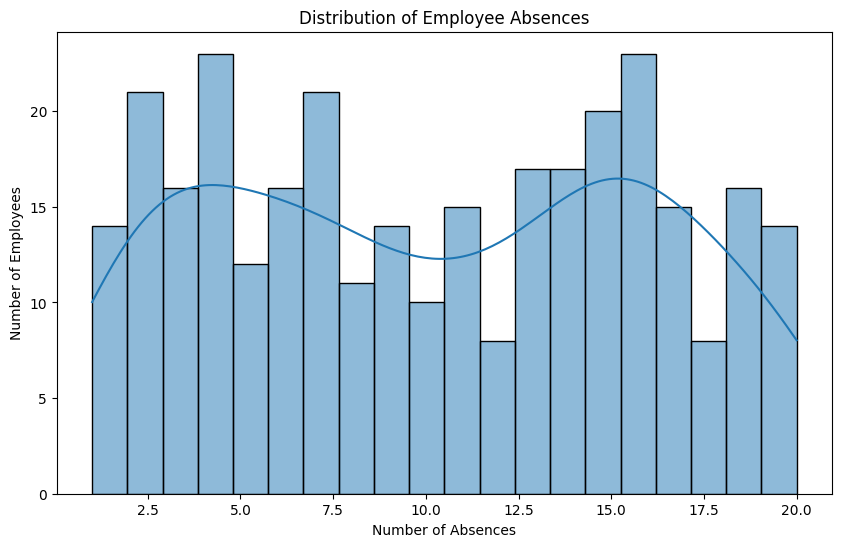

In [64]:
#absenteeism (Absences) distribution among employees.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df["Absences"], bins=20, kde=True)
plt.title("Distribution of Employee Absences")
plt.xlabel("Number of Absences")
plt.ylabel("Number of Employees")
plt.show()

In [78]:
#Standardizing numerical features
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Select numerical features
numerical_features = df.select_dtypes(include=["float64", "int64"])

# Build pipeline: Imputation → Scaling → PCA
pca_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),   # Handle NaNs
    ("scaler", StandardScaler()),                  # Standardize data
    ("pca", PCA(n_components=2))                   # Reduce to 2 principal components
])

# Fit and transform the data
pca_data = pca_pipeline.fit_transform(numerical_features)

# Convert PCA output to DataFrame
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
print(pca_df.head())



        PC1       PC2
0  1.453757 -1.648732
1  1.821872  0.766548
2 -1.708556 -0.546192
3  0.797762 -1.021244
4 -1.026920 -3.167015


In [83]:
#Perform PCA on the dataset

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Select only numeric columns
numeric_df = df.select_dtypes(include=["float64", "int64"])

pca_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2))  # keep first 2 principal components
])
#Fit and transform
pca_data = pca_pipeline.fit_transform(numerical_features)

#Create DataFrame of PCA results
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
print(pca_df.head())

#Explain variance ratios
pca_model = pca_pipeline.named_steps["pca"]
print("Explained variance ratio:", pca_model.explained_variance_ratio_)





        PC1       PC2
0  1.453757 -1.648732
1  1.821872  0.766548
2 -1.708556 -0.546192
3  0.797762 -1.021244
4 -1.026920 -3.167015
Explained variance ratio: [0.1707027  0.13962061]


####Explanation of the first two components
PC1 = 17.1%  #Represents the direction in the dataset that captures the largest variance.Loads on performanceScore showing performance axis

PC2 = 13.9% #Variance is independent to PCA1.

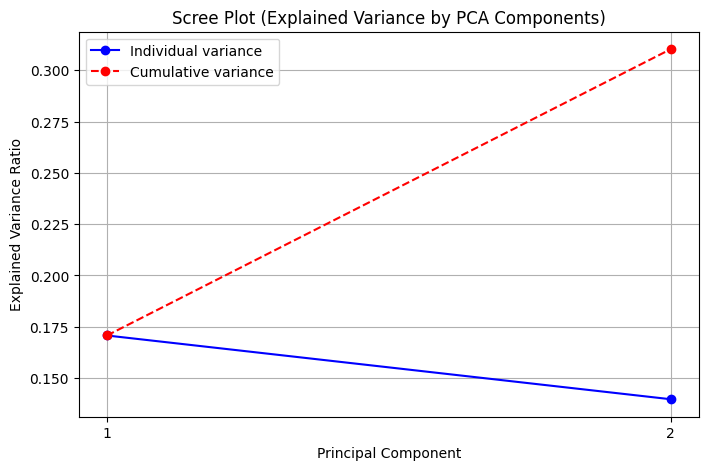

In [84]:
#variance ratio for the PCA components
import matplotlib.pyplot as plt
import numpy as np

# Get explained variance ratio from PCA model
explained_var = pca_model.explained_variance_ratio_

# Create scree plot
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(explained_var)+1), explained_var, marker="o", linestyle="-", color="b", label="Individual variance")
plt.plot(np.arange(1, len(explained_var)+1), np.cumsum(explained_var), marker="o", linestyle="--", color="r", label="Cumulative variance")

plt.title("Scree Plot (Explained Variance by PCA Components)")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(np.arange(1, len(explained_var)+1))
plt.legend()
plt.grid(True)
plt.show()


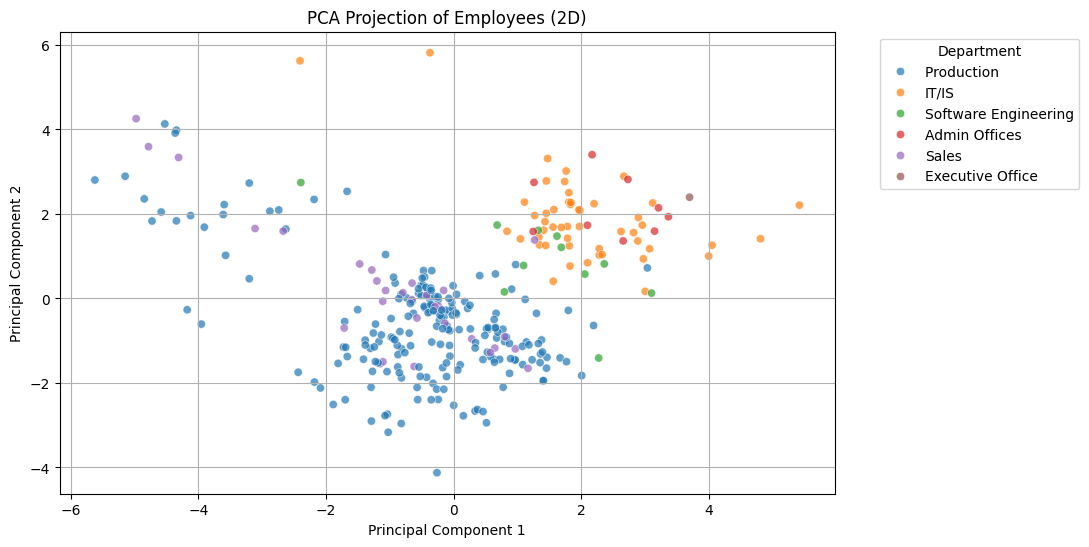

In [85]:
#employees colored by department.
import matplotlib.pyplot as plt
import seaborn as sns

#Reduce to 2D with PCA (already done earlier)
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
pca_df["Department"] = df["Department"]  # add Department column back

#Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="Department",   # color by department
    palette="tab10",    # nice distinct colors
    alpha=0.7
)

plt.title("PCA Projection of Employees (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [86]:
#variables contributing most to the first principal component

pc1_loadings = pd.Series(
    pca_model.components_[0],  # PC1 is the first row
    index=numerical_features.columns
)

# Sort by absolute contribution
pc1_sorted = pc1_loadings.abs().sort_values(ascending=False)

print("Top variables contributing to PC1:")
print(pc1_sorted)



Top variables contributing to PC1:
PerfScoreID               0.389986
DaysLateLast30            0.374140
EmpID                     0.360228
EngagementSurvey          0.325343
DeptID                    0.321400
SpecialProjectsCount      0.311073
ManagerID                 0.281490
Salary                    0.277308
Termd                     0.212160
EmpStatusID               0.205226
EmpSatisfaction           0.139491
Zip                       0.075950
PositionID                0.051123
FromDiversityJobFairID    0.021224
Absences                  0.020836
MarriedID                 0.013053
MaritalStatusID           0.006949
Age                       0.006335
GenderID                  0.002054
dtype: float64


In [88]:
print(df.columns.tolist())


['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'Age', 'TermDate']


In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


features = ["EngagementSurvey", "EmpSatisfaction", "Absences"]
subset = df[features]

# Standardize the data
scaler = StandardScaler()
scaled_subset = scaler.fit_transform(subset)

# Apply PCA
pca = PCA()
pca.fit(scaled_subset)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Cumulative variance
print("Cumulative variance:", pca.explained_variance_ratio_.cumsum())


Explained variance ratio: [0.39958328 0.33535499 0.26506173]
Cumulative variance: [0.39958328 0.73493827 1.        ]


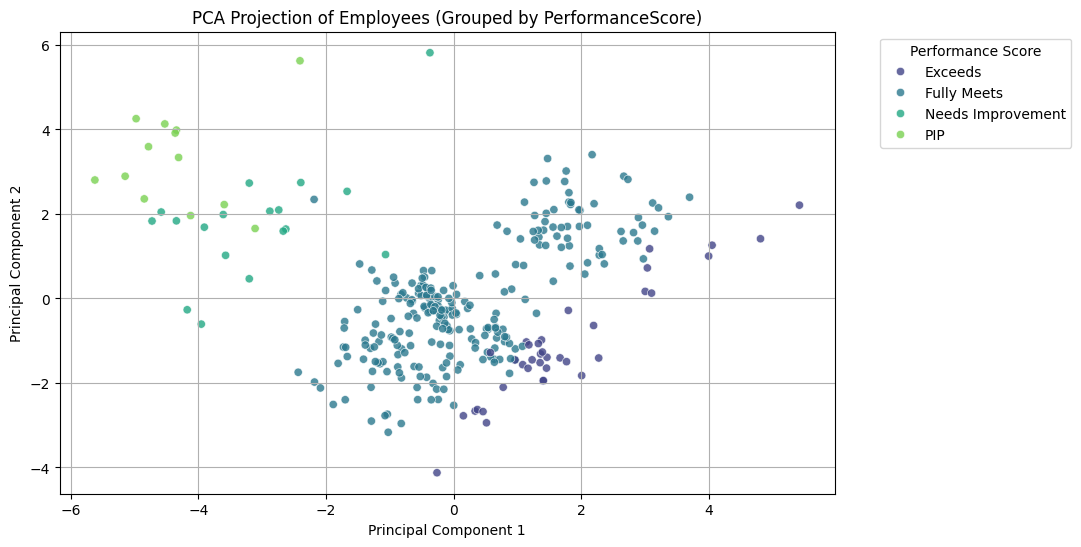

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns


pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
pca_df["PerformanceScore"] = df["PerformanceScore"]

# Scatter plot colored by PerformanceScore
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="PerformanceScore",
    palette="viridis",   # continuous colormap
    alpha=0.8
)

plt.title("PCA Projection of Employees (Grouped by PerformanceScore)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Performance Score", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Silhouette Score (Original Data): 0.146
Silhouette Score (PCA Data): 0.558


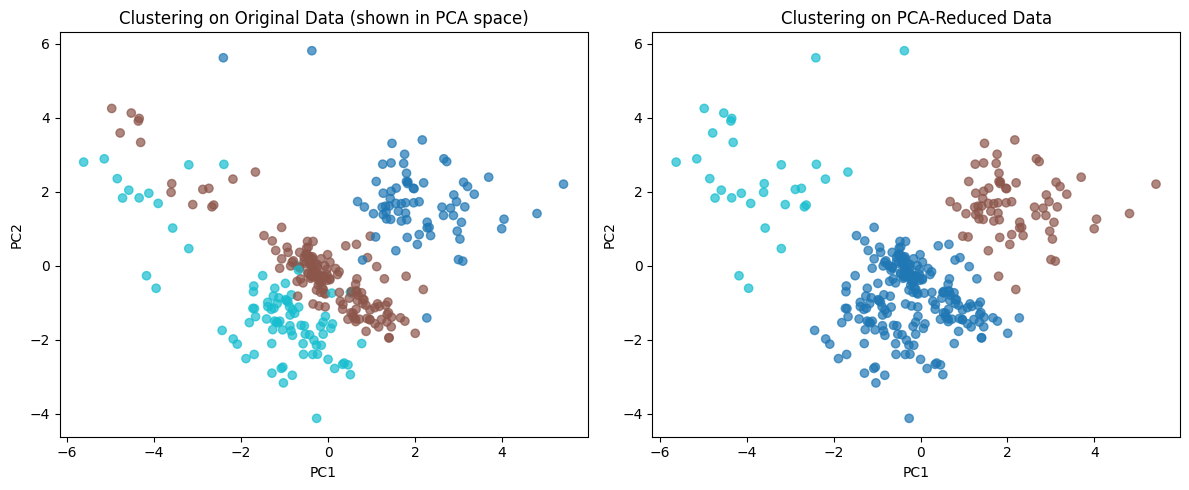

In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

#Select numeric data
numerical_features = df.select_dtypes(include=["float64", "int64"])

#Handle missing values
imputer = SimpleImputer(strategy="mean")
imputed_data = imputer.fit_transform(numerical_features)

#Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

#KMeans on original data
kmeans_original = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_original = kmeans_original.fit_predict(scaled_data)
silhouette_original = silhouette_score(scaled_data, labels_original)
print(f"Silhouette Score (Original Data): {silhouette_original:.3f}")

#PCA reduction (2D for visualization)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

#KMeans on PCA-reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(pca_data)
silhouette_pca = silhouette_score(pca_data, labels_pca)
print(f"Silhouette Score (PCA Data): {silhouette_pca:.3f}")

#Visualize results
plt.figure(figsize=(12,5))

# Original clustering (plotted in PCA space for 2D visualization)
plt.subplot(1, 2, 1)
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels_original, cmap="tab10", alpha=0.7)
plt.title("Clustering on Original Data (shown in PCA space)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# PCA clustering
plt.subplot(1, 2, 2)
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels_pca, cmap="tab10", alpha=0.7)
plt.title("Clustering on PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()


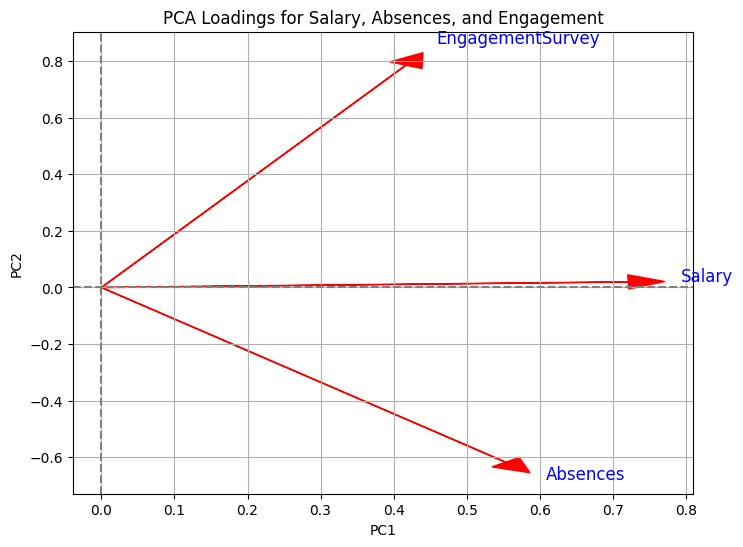

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Select features of interest
features = ["Salary", "Absences", "EngagementSurvey"]
subset = df[features].dropna()  # drop rows with missing values

#Standardize the data 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset)

# Apply PCA 
# pca = PCA(n_components=2)
pca.fit(scaled_data)

#Extract loadings (contributions of each variable) 
loadings = pca.components_.T  # shape: (n_features, n_components)
pc_names = ["PC1", "PC2"]

#Plot loadings as arrows (biplot style)
plt.figure(figsize=(8,6))

for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i,0], loadings[i,1], 
              head_width=0.05, head_length=0.05, color="r")
    plt.text(loadings[i,0]*1.1, loadings[i,1]*1.1, feature, color="b", fontsize=12)

plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Loadings for Salary, Absences, and Engagement")
plt.grid(True)
plt.show()


####Situations Where PCA is Useful in HR Analytics
#Reducing employee survey dimensions to a few latent factors (like “Engagement” or “Satisfaction”), which makes analysis and reporting easier without losing much information.
#Reducing Noise in High-Dimensional HR Data through focussing on the most informative axes of variation.
#By reducing data to 2D or 3D, PCA makes it easier to visualize employee groups.
